 BITCOIN PREDICTION 2022

Linear, ARIMA & SARIMA Model

In [60]:
# Import Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import time
import datetime
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import statsmodels.api as sms
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.model_selection import train_test_split

In [2]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [3]:
import psycopg2
import pandas as pd
conn = psycopg2.connect(database="CRYPTO",
                        user='postgres', password='WelcomE01', 
                        host='127.0.0.1', port='5432'
)
  
conn.autocommit = True
cursor = conn.cursor()
sql = '''CREATE TABLE CRYPO_DATA_FEED (
TimeStamp	bigint NOT NULL,
Open  		NUMERIC(8,2),
High 		NUMERIC(8,2),
Low	 		NUMERIC(8,2),
Close		NUMERIC(8,2),
Volume_BTC Float,
Volume_Crrency Float,
Weightted_Price float,
	PRIMARY KEY (TimeStamp)
);'''
cursor.execute(sql)
csv_file_name = 'bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv'

sql = "COPY CRYPO_DATA_FEED FROM STDIN DELIMITER ',' CSV HEADER"

cursor.copy_expert(sql, open(csv_file_name, "r"))

DuplicateTable: relation "crypo_data_feed" already exists


In [4]:
Bit_df = pd.read_sql("select * from CRYPO_DATA_FEED", conn);
Bit_df.head()

KeyboardInterrupt: 

In [129]:
# Import Data
Bit_df = pd.read_csv("C:/Users/v-ansi20/Desktop/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")
Bit_df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
Bit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [131]:
Bit_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Timestamp,4857377.0,1.471301e+09,8.428019e+07,1.325318e+09,1.398179e+09,1.471428e+09,1.544288e+09,1.617149e+09
Open,3613769.0,6.009024e+03,8.996247e+03,3.800000e+00,4.438600e+02,3.596970e+03,8.627270e+03,6.176356e+04
High,3613769.0,6.013357e+03,9.003521e+03,3.800000e+00,4.440000e+02,3.598190e+03,8.632980e+03,6.178183e+04
Low,3613769.0,6.004488e+03,8.988778e+03,1.500000e+00,4.435200e+02,3.595620e+03,8.621090e+03,6.167355e+04
Close,3613769.0,6.009014e+03,8.996360e+03,1.500000e+00,4.438600e+02,3.597000e+03,8.627160e+03,6.178180e+04
Volume_(BTC),3613769.0,9.323249e+00,3.054989e+01,0.000000e+00,4.097759e-01,1.979811e+00,7.278216e+00,5.853852e+03
Volume_(Currency),3613769.0,4.176284e+04,1.518248e+05,0.000000e+00,4.521422e+02,3.810124e+03,2.569821e+04,1.390067e+07
Weighted_Price,3613769.0,6.008935e+03,8.995992e+03,3.800000e+00,4.438306e+02,3.596804e+03,8.627637e+03,6.171621e+04


In [132]:
Bit_df.isnull().values.any() # If there are any null values in data set

True

In [133]:
#Finding what all columns has null values and if it does then how many
Bit_df.isnull().sum()
# other than Timestamp all columns has null values, will imputing to fix this issue

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

In [134]:
# Data Preprocessing 
# Clean DataFrame for Prediction utilization. 
# Remove Volume Currency, Volume_(BTC) from dataframe
Bit_df.drop(['Volume_(Currency)','Volume_(BTC)'],1,inplace=True)
Bit_df.head()

,Timestamp,Open,High,Low,Close,Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN


In [135]:
# Rename Timestamp and Weighted_Price
Bit_df.rename(columns = {'Timestamp':'DateTime', 'Weighted_Price':'Weighted Price'}, inplace = True)
Bit_df.head()

,DateTime,Open,High,Low,Close,Weighted Price
0,1325317920,4.39,4.39,4.39,4.39,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN


In [136]:
Bitcoin_df = Bit_df.copy(deep=True)
Bitcoin_df.head()

,DateTime,Open,High,Low,Close,Weighted Price
0,1325317920,4.39,4.39,4.39,4.39,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN


In [137]:
Bit_df['DateTime'] = pd.to_datetime(Bit_df['DateTime'], unit='s')
Bit_df['DateTime'] = pd.to_datetime(Bit_df['DateTime']).dt.to_period('m')
Bit_df.set_index(Bit_df['DateTime'], inplace=True)
Bit_df=Bit_df.to_timestamp()
Bit_df.head()

,DateTime,Open,High,Low,Close,Weighted Price
DateTime,,,,,,
2011-12-01,2011-12,4.39,4.39,4.39,4.39,4.39
2011-12-01,2011-12,NaN,NaN,NaN,NaN,NaN
2011-12-01,2011-12,NaN,NaN,NaN,NaN,NaN
2011-12-01,2011-12,NaN,NaN,NaN,NaN,NaN
2011-12-01,2011-12,NaN,NaN,NaN,NaN,NaN


In [138]:
Bit_df['High'].fillna(method='ffill', inplace=True)
Bit_df['Low'].fillna(method='ffill', inplace=True)
Bit_df['Close'].fillna(method='ffill', inplace=True)
Bit_df['Open'].fillna(method='ffill', inplace=True)
Bit_df['Weighted Price'].fillna(method='ffill', inplace=True)

No handles with labels found to put in legend.


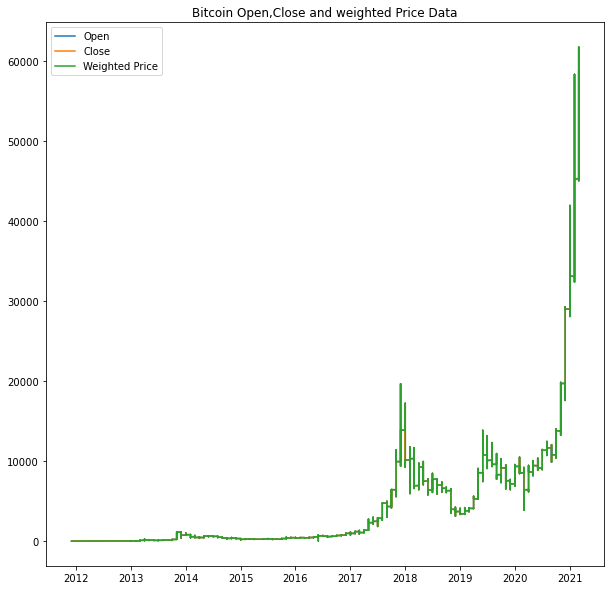

In [139]:
#Exploratory Data Analysis:
#Plot for last 9 yaers weighted price over years
plt.figure(figsize=[10,10])
plt.legend(loc='best')
plt.title('Bitcoin Open,Close and weighted Price Data')
plt.plot(Bit_df['Weighted Price'])
plt.plot(Bit_df['Open'])
plt.plot(Bit_df['Close'])
plt.legend(['Open','Close','Weighted Price'])
plt.show()

In [53]:
# Header 
# Let's use 2021 Bitcoin Data only.

In [140]:
# Dataframe fpr 2011 to 2015 data
Bitcoin_df_2011_2015 = Bit_df[(Bit_df["DateTime"] >= '2011-01-01')&(Bit_df["DateTime"] <= '2015-12-31')]
Bitcoin_df_2011_2015.head()

,DateTime,Open,High,Low,Close,Weighted Price
DateTime,,,,,,
2011-12-01,2011-12,4.39,4.39,4.39,4.39,4.39
2011-12-01,2011-12,4.39,4.39,4.39,4.39,4.39
2011-12-01,2011-12,4.39,4.39,4.39,4.39,4.39
2011-12-01,2011-12,4.39,4.39,4.39,4.39,4.39
2011-12-01,2011-12,4.39,4.39,4.39,4.39,4.39


No handles with labels found to put in legend.


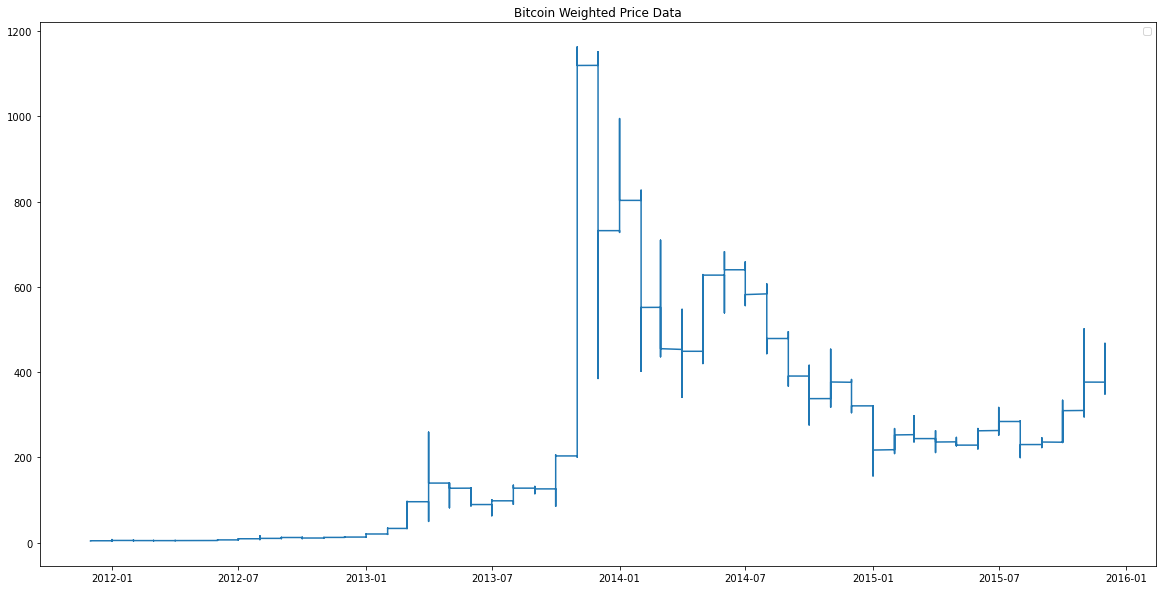

In [142]:
#Ploting for every 4 years bracket
plt.figure(figsize=[20,10])
plt.legend(loc='best')
plt.title('Bitcoin Weighted Price Data')
plt.plot(Bitcoin_df_2011_2015['Weighted Price'])
plt.show()

In [144]:
# Dataframe fpr 2016 to 2020 data
Bitcoin_df_2016_2020 = Bit_df[(Bit_df["DateTime"] >= '2016-01-01')&(Bit_df["DateTime"] <= '2020-12-31')]
Bitcoin_df_2016_2020.head()

,DateTime,Open,High,Low,Close,Weighted Price
DateTime,,,,,,
2016-01-01,2016-01,429.77,430.89,429.77,430.89,429.891959
2016-01-01,2016-01,430.89,430.89,430.89,430.89,430.890000
2016-01-01,2016-01,430.89,430.89,430.89,430.89,430.890000
2016-01-01,2016-01,430.89,430.89,430.89,430.89,430.890000
2016-01-01,2016-01,430.19,431.06,430.19,431.06,430.773269


No handles with labels found to put in legend.


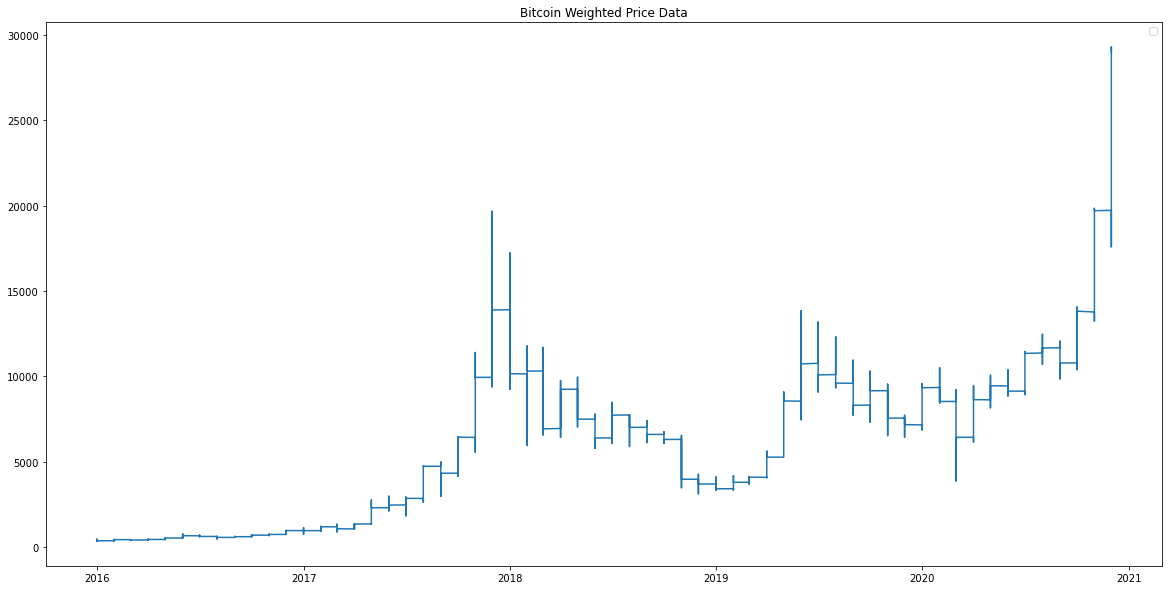

In [145]:
#Ploting for every 4 years bracket
plt.figure(figsize=[20,10])
plt.legend(loc='best')
plt.title('Bitcoin Weighted Price Data')
plt.plot(Bitcoin_df_2016_2020['Weighted Price'])
plt.show()

In [146]:
# Dataframe for 2021 and beyond
Bitcoin_df_2021_B = Bit_df[(Bit_df["DateTime"] >= '2021-01-01')]
Bitcoin_df_2021_B.head()

,DateTime,Open,High,Low,Close,Weighted Price
DateTime,,,,,,
2021-01-01,2021-01,28999.63,29022.01,28999.14,29006.31,29005.427056
2021-01-01,2021-01,29007.31,29086.90,29007.31,29083.47,29060.083494
2021-01-01,2021-01,29069.80,29073.02,29028.14,29035.89,29054.635517
2021-01-01,2021-01,29037.68,29069.39,29019.00,29048.13,29040.017999
2021-01-01,2021-01,29048.13,29057.73,29035.61,29045.19,29039.843410


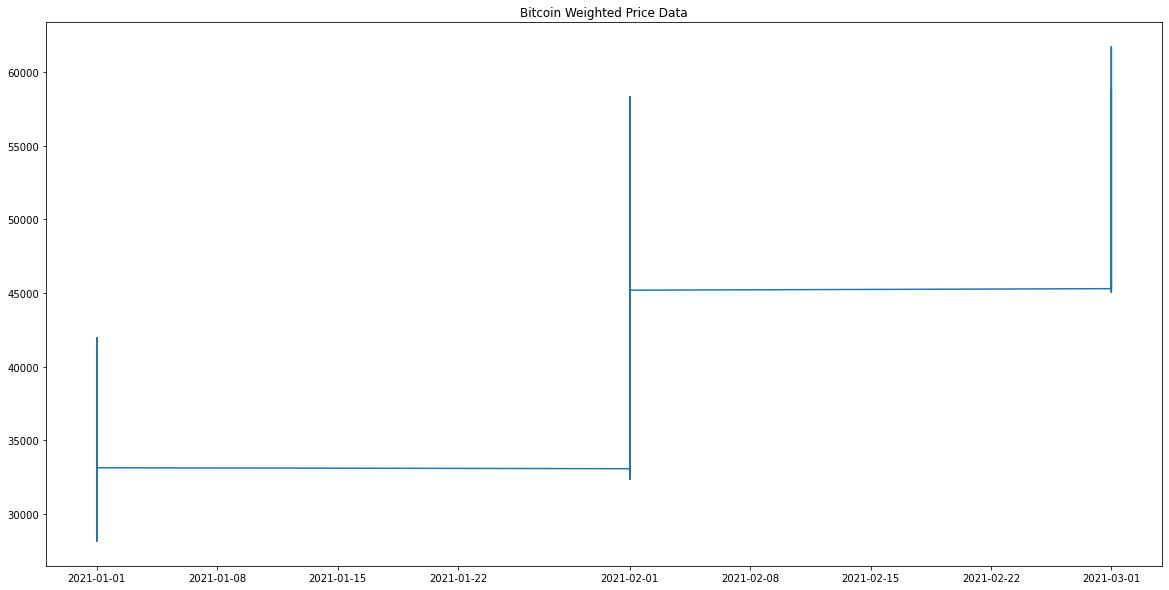

In [164]:
#Ploting for every 4 years bracket
plt.figure(figsize=[20,10])
#plt.legend(loc='best')
plt.title('Bitcoin Weighted Price Data')
plt.plot(Bitcoin_df_2021_B['Weighted Price'])
plt.show()

In [15]:
# Let's create a new dataframe to use for our prediction
#Convert Timestamp into TimeZone (ET)
Bitcoin_df['DateTime'] = (pd.to_datetime(Bitcoin_df['DateTime'], unit='s')
                    .dt.tz_localize('est')
                     .dt.tz_convert('America/New_York'))
# show the first 5 rows
Bitcoin_df.head()

,DateTime,Open,High,Low,Close,Weighted Price
0,2011-12-31 07:52:00-05:00,4.39,4.39,4.39,4.39,4.39
1,2011-12-31 07:53:00-05:00,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 07:54:00-05:00,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 07:55:00-05:00,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 07:56:00-05:00,NaN,NaN,NaN,NaN,NaN


In [16]:
Bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 6 columns):
 #   Column          Dtype                           
---  ------          -----                           
 0   DateTime        datetime64[ns, America/New_York]
 1   Open            float64                         
 2   High            float64                         
 3   Low             float64                         
 4   Close           float64                         
 5   Weighted Price  float64                         
dtypes: datetime64[ns, America/New_York](1), float64(5)
memory usage: 222.4 MB


### Let's use 2021 Bitcoin Data only for predicton of 2021 April month price.

In [17]:
#Let's filter new DataFrame for 2021 year/data only. 
Bitcoin2021_df = Bitcoin_df[(Bitcoin_df["DateTime"] >= '2021-01-01')]
Bitcoin2021_df.head()

,DateTime,Open,High,Low,Close,Weighted Price
4729216,2021-01-01 00:00:00-05:00,28999.63,29022.01,28999.14,29006.31,29005.427056
4729217,2021-01-01 00:01:00-05:00,29007.31,29086.90,29007.31,29083.47,29060.083494
4729218,2021-01-01 00:02:00-05:00,29069.80,29073.02,29028.14,29035.89,29054.635517
4729219,2021-01-01 00:03:00-05:00,29037.68,29069.39,29019.00,29048.13,29040.017999
4729220,2021-01-01 00:04:00-05:00,29048.13,29057.73,29035.61,29045.19,29039.843410


In [18]:
Bitcoin2021_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128161 entries, 4729216 to 4857376
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype                           
---  ------          --------------   -----                           
 0   DateTime        128161 non-null  datetime64[ns, America/New_York]
 1   Open            128025 non-null  float64                         
 2   High            128025 non-null  float64                         
 3   Low             128025 non-null  float64                         
 4   Close           128025 non-null  float64                         
 5   Weighted Price  128025 non-null  float64                         
dtypes: datetime64[ns, America/New_York](1), float64(5)
memory usage: 6.8 MB


In [19]:
#Finding what all columns has null values and if it does then how many
Bitcoin2021_df.isnull().sum()

DateTime            0
Open              136
High              136
Low               136
Close             136
Weighted Price    136
dtype: int64

In [20]:
#And fill null values in 'High','Low','Close' with forward fill method.
Bitcoin2021_df['High'].fillna(method='ffill', inplace=True)
Bitcoin2021_df['Low'].fillna(method='ffill', inplace=True)
Bitcoin2021_df['Close'].fillna(method='ffill', inplace=True)
Bitcoin2021_df['Open'].fillna(method='ffill', inplace=True)
Bitcoin2021_df['Weighted Price'].fillna(method='ffill', inplace=True)

C:\Users\v-ansi20\Anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [21]:
Bitcoin2021_df.isnull().sum()

DateTime          0
Open              0
High              0
Low               0
Close             0
Weighted Price    0
dtype: int64

No handles with labels found to put in legend.


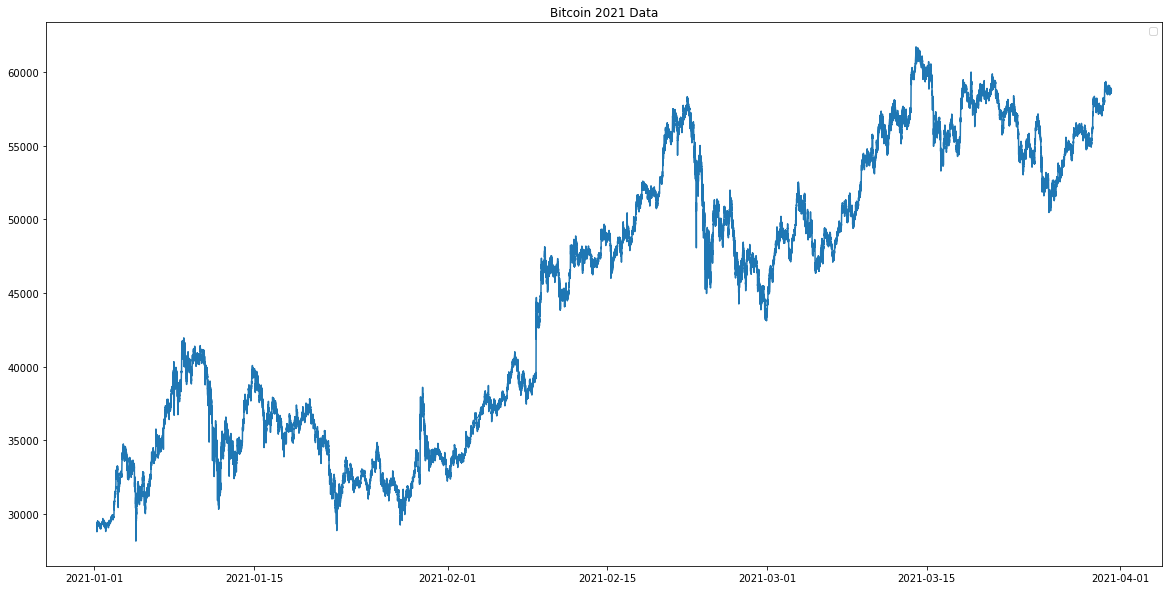

In [42]:
plt.figure(figsize=[20,10])
plt.legend(loc='best')
plt.title('Bitcoin 2021 Data')
plt.plot(Bitcoin2021_df['Weighted Price'])
plt.show()

In [22]:
# Assing Timestamp as a index
Bitcoin2021_df.index = Bitcoin2021_df.DateTime
Bitcoin2021_df.head()

,DateTime,Open,High,Low,Close,Weighted Price
DateTime,,,,,,
2021-01-01 00:00:00-05:00,2021-01-01 00:00:00-05:00,28999.63,29022.01,28999.14,29006.31,29005.427056
2021-01-01 00:01:00-05:00,2021-01-01 00:01:00-05:00,29007.31,29086.90,29007.31,29083.47,29060.083494
2021-01-01 00:02:00-05:00,2021-01-01 00:02:00-05:00,29069.80,29073.02,29028.14,29035.89,29054.635517
2021-01-01 00:03:00-05:00,2021-01-01 00:03:00-05:00,29037.68,29069.39,29019.00,29048.13,29040.017999
2021-01-01 00:04:00-05:00,2021-01-01 00:04:00-05:00,29048.13,29057.73,29035.61,29045.19,29039.843410


In [23]:
# Resampling to daily frequency
Bitcoin2021_df_data = Bitcoin2021_df.resample('D').mean()


In [24]:
# Remove Last Update column
Bitcoin2021_df.drop(['DateTime'],1,inplace=True)
# show the first 5 rows
Bitcoin2021_df.head()

C:\Users\v-ansi20\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Open,High,Low,Close,Weighted Price
DateTime,,,,,
2021-01-01 00:00:00-05:00,28999.63,29022.01,28999.14,29006.31,29005.427056
2021-01-01 00:01:00-05:00,29007.31,29086.90,29007.31,29083.47,29060.083494
2021-01-01 00:02:00-05:00,29069.80,29073.02,29028.14,29035.89,29054.635517
2021-01-01 00:03:00-05:00,29037.68,29069.39,29019.00,29048.13,29040.017999
2021-01-01 00:04:00-05:00,29048.13,29057.73,29035.61,29045.19,29039.843410


In [25]:
# Esport Clean 2021 DF into CSV
#Bitcoin2021_df.to_csv (r'C:/Users/v-ansi20/Desktop/Bitcoin_2021_Clean.csv', index = False, header=True)

In [82]:
#Now we have a clean Weighted Price to predict some Bitcoin Price for the next 15 days. 

In [ ]:
# 15 Days Prediction Model
# Machine Learning Coding. 
# Create Variable bitCoinPredictionDays to set the days.

In [27]:
# Create another column shifted 'n'  units up
bitCoinPredictionDays = 15
Bitcoin2021_df_data['Prediction 15 Days'] = (Bitcoin2021_df_data[['Weighted Price']].shift(-bitCoinPredictionDays)).iloc[:-bitCoinPredictionDays]
# show the first 5 rows
Bitcoin2021_df_data.head()

,Open,High,Low,Close,Weighted Price,Prediction > 15 Days
DateTime,,,,,,
2021-01-01 00:00:00-05:00,29288.696937,29305.634083,29271.218694,29289.323146,29288.824917,36843.579658
2021-01-02 00:00:00-05:00,30757.308146,30788.244361,30723.941208,30759.932167,30757.429533,35650.716332
2021-01-03 00:00:00-05:00,33467.147104,33507.975028,33425.661465,33468.163000,33467.362526,36045.605943
2021-01-04 00:00:00-05:00,31856.851236,31903.705937,31807.243889,31856.172236,31856.122685,36858.910679
2021-01-05 00:00:00-05:00,32272.714361,32314.153514,32230.931611,32274.551042,32273.087909,35152.737304


In [28]:
# Remove all columns except Weighted Price from Bitcoin2021_df
#Bitcoin2021_df.drop(['Open','High','Low','Close','Date','Date_year','Date_month','Date_day','Date_hour','Date_minute','Date_second'],1,inplace=True)
Bitcoin2021_df_data.drop(['Open','High','Low','Close'],1,inplace=True)
# show the first 5 rows
Bitcoin2021_df_data.head()

,Weighted Price,Prediction > 15 Days
DateTime,,
2021-01-01 00:00:00-05:00,29288.824917,36843.579658
2021-01-02 00:00:00-05:00,30757.429533,35650.716332
2021-01-03 00:00:00-05:00,33467.362526,36045.605943
2021-01-04 00:00:00-05:00,31856.122685,36858.910679
2021-01-05 00:00:00-05:00,32273.087909,35152.737304


In [30]:
# Let's Create the independent Dataset.
# Here we will convert our Bitcoin2021_df Dataframe into a Numpy Array and drop the "Prediction > 15 Days" column
x = np.array(Bitcoin2021_df_data.drop(['Prediction 15 Days'],1))

# Remove the last 'n' rows where 'n' is the bitCoinPredictionDays
x = x[:len(Bitcoin2021_df_data)-bitCoinPredictionDays]
print(x)

[[29288.82491659]
 [30757.42953276]
 [33467.36252563]
 [31856.12268529]
 [32273.08790919]
 [34904.99738251]
 [38067.44547188]
 [39807.60373885]
 [40395.37008796]
 [39727.27752555]
 [34277.11000771]
 [34840.25015275]
 [34673.97475176]
 [38508.4566827 ]
 [37468.42796356]
 [36843.57965776]
 [35650.71633197]
 [36045.6059433 ]
 [36858.91067923]
 [35152.73730396]
 [32949.07245171]
 [31861.05734118]
 [32351.57706899]
 [32225.945556  ]
 [33353.08542052]
 [31997.22146352]
 [31149.41936392]
 [31793.88444246]
 [35051.46781385]
 [34053.71261723]
 [33450.19941688]
 [33705.97519065]
 [34713.69640011]
 [36573.09481031]
 [37541.54813242]
 [37629.5087247 ]
 [39813.9994791 ]
 [38712.24507392]
 [41193.15840479]
 [46684.49084956]
 [45798.73371536]
 [46272.21566854]
 [47603.41542012]
 [47274.09972149]
 [48597.20121785]
 [47863.00142675]
 [48845.16600343]
 [50913.92413875]
 [51893.31118122]
 [53083.8791088 ]
 [56271.28853768]
 [57039.94262654]
 [54708.31202511]
 [48968.83794591]
 [49800.28486888]
 [49985.69

In [31]:
# Create the dependent Dataset.
# Convert the DataFrame into a Numpy Array
y = np.array(Bitcoin2021_df_data['Prediction 15 Days'])

# Get all the values except last 'n' rows
y = y[:-bitCoinPredictionDays]
print(y)

[36843.57965776 35650.71633197 36045.6059433  36858.91067923
 35152.73730396 32949.07245171 31861.05734118 32351.57706899
 32225.945556   33353.08542052 31997.22146352 31149.41936392
 31793.88444246 35051.46781385 34053.71261723 33450.19941688
 33705.97519065 34713.69640011 36573.09481031 37541.54813242
 37629.5087247  39813.9994791  38712.24507392 41193.15840479
 46684.49084956 45798.73371536 46272.21566854 47603.41542012
 47274.09972149 48597.20121785 47863.00142675 48845.16600343
 50913.92413875 51893.31118122 53083.8791088  56271.28853768
 57039.94262654 54708.31202511 48968.83794591 49800.28486888
 49985.69270695 46655.92004852 47131.78965051 44820.02757219
 47640.76400377 48617.2893209  50426.99429908 49398.25039857
 47717.64330028 48372.18167985 50214.46863755 50797.90669559
 53980.84726168 55373.17729522 56272.1801333  56826.56003305
 58793.69890935 60470.09631934 57673.98826494 55333.38261386
 56065.98468576 58509.42791999 58263.34302761 58775.04979443
 57347.44031525 56910.98

In [32]:
# Applying 1st model Linear regression model to predic values

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2, random_state = 1)

print(X_train)

[[46684.49084956]
 [36843.57965776]
 [47274.09972149]
 [37629.5087247 ]
 [55373.17729522]
 [47640.76400377]
 [57673.98826494]
 [44820.02757219]
 [46655.92004852]
 [39813.9994791 ]
 [54708.31202511]
 [33705.97519065]
 [50214.46863755]
 [41193.15840479]
 [31861.05734118]
 [50797.90669559]
 [31856.12268529]
 [47131.78965051]
 [51893.31118122]
 [50426.99429908]
 [47863.00142675]
 [33353.08542052]
 [40395.37008796]
 [36045.6059433 ]
 [29288.82491659]
 [53980.84726168]
 [48845.16600343]
 [39807.60373885]
 [58793.69890935]
 [53083.8791088 ]
 [38508.4566827 ]
 [32351.57706899]
 [34713.69640011]
 [33450.19941688]
 [46272.21566854]
 [57039.94262654]
 [32225.945556  ]
 [32273.08790919]
 [56272.1801333 ]
 [37468.42796356]
 [34053.71261723]
 [35051.46781385]
 [47603.41542012]
 [34840.25015275]
 [47717.64330028]
 [36858.91067923]
 [55333.38261386]
 [49398.25039857]
 [32949.07245171]
 [56271.28853768]
 [31997.22146352]
 [38067.44547188]
 [30757.42953276]
 [35650.71633197]
 [48372.18167985]
 [34904.99

In [34]:
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

LinearRegression()

In [35]:
# Get the last 15 days rows data from feature data set
x_future= Bitcoin2021_df_data.drop(['Prediction 15 Days'],1)[:-bitCoinPredictionDays]
x_future = x_future.tail(bitCoinPredictionDays)
x_future = np.array(x_future)
x_future

array([[48617.2893209 ],
       [50426.99429908],
       [49398.25039857],
       [47717.64330028],
       [48372.18167985],
       [50214.46863755],
       [50797.90669559],
       [53980.84726168],
       [55373.17729522],
       [56272.1801333 ],
       [56826.56003305],
       [58793.69890935],
       [60470.09631934],
       [57673.98826494],
       [55333.38261386]])

In [36]:
y_future_predict = regression_model.predict(x_future)
y_future_predict

array([50684.49473444, 51974.13182998, 51241.02543314, 50043.386435  ,
       50509.82543192, 51822.68119015, 52238.45247424, 54506.6886102 ,
       55498.89478864, 56139.54474151, 56534.6085184 , 57936.43660506,
       59131.07568317, 57138.5052291 , 55470.53618991])

<ipython-input-165-755c6c854f5c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = y_future_predict


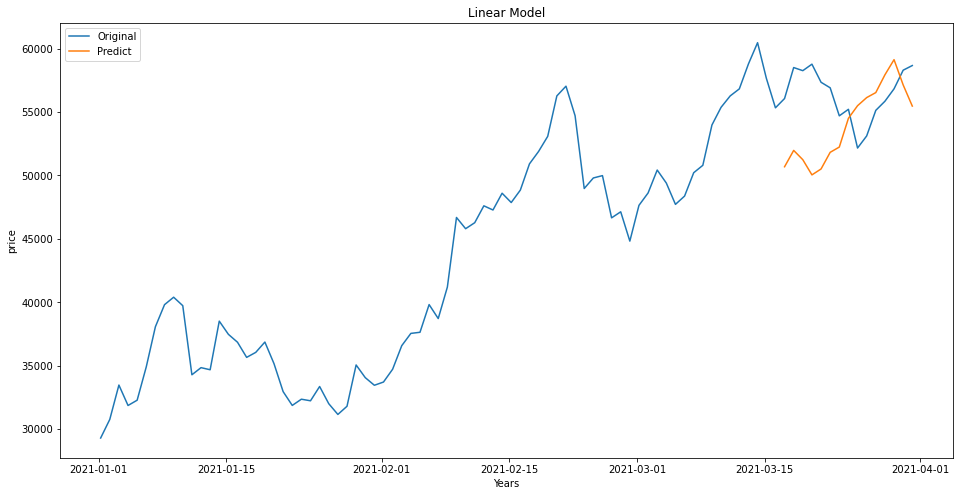

In [165]:
# data visualization
valid = Bitcoin2021_df_data[x.shape[0]:]
valid['Prediction'] = y_future_predict
plt.figure(figsize=(16,8))
plt.title('Linear Model')
plt.xlabel('Years')
plt.ylabel('price')
plt.plot(Bitcoin2021_df_data['Weighted Price'])
plt.plot(valid['Prediction'])
plt.legend(['Original','Predict'])
plt.savefig("Linear.jpg")
plt.show()

In [38]:
valid

,Weighted Price,Prediction > 15 Days,Prediction
DateTime,,,
2021-03-17 00:00:00-04:00,56065.984686,NaN,50684.494734
2021-03-18 00:00:00-04:00,58509.427920,NaN,51974.131830
2021-03-19 00:00:00-04:00,58263.343028,NaN,51241.025433
2021-03-20 00:00:00-04:00,58775.049794,NaN,50043.386435
2021-03-21 00:00:00-04:00,57347.440315,NaN,50509.825432
2021-03-22 00:00:00-04:00,56910.988702,NaN,51822.681190
2021-03-23 00:00:00-04:00,54701.372445,NaN,52238.452474
2021-03-24 00:00:00-04:00,55215.241297,NaN,54506.688610
2021-03-25 00:00:00-04:00,52161.527206,NaN,55498.894789


In [39]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Printout relevant metrics
print("Model Coefficients:", regression_model.coef_)
print("Mean Absolute Error:", mean_absolute_error(Y_test, y_future_predict))
print("Coefficient of Determination:", r2_score(Y_test, y_future_predict))

Model Coefficients: [0.71262284]
Mean Absolute Error: 7409.788994001129
Coefficient of Determination: -0.6428232771432372


In [54]:
Bitcoin2021_df_copy = Bitcoin2021_df.copy(deep=True)
Bitcoin2021_df_copy.head()

,Open,High,Low,Close,Weighted Price
DateTime,,,,,
2021-01-01 00:00:00-05:00,28999.63,29022.01,28999.14,29006.31,29005.427056
2021-01-01 00:01:00-05:00,29007.31,29086.90,29007.31,29083.47,29060.083494
2021-01-01 00:02:00-05:00,29069.80,29073.02,29028.14,29035.89,29054.635517
2021-01-01 00:03:00-05:00,29037.68,29069.39,29019.00,29048.13,29040.017999
2021-01-01 00:04:00-05:00,29048.13,29057.73,29035.61,29045.19,29039.843410


<AxesSubplot:xlabel='DateTime'>

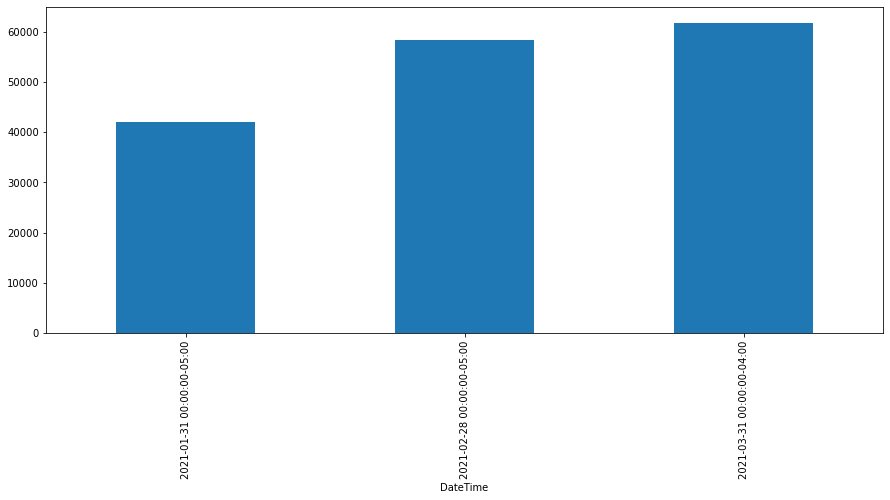

In [55]:
Bitcoin2021_df_copy['Close'].resample(rule='M').max().plot(kind='bar',figsize=(15,6))

In [57]:
# Resampling to daily frequency
Bitcoin2021_df_copy = Bitcoin2021_df_copy.resample('D').mean()
Bitcoin2021_df_copy.head()

,Open,High,Low,Close,Weighted Price
DateTime,,,,,
2021-01-01 00:00:00-05:00,29288.696937,29305.634083,29271.218694,29289.323146,29288.824917
2021-01-02 00:00:00-05:00,30757.308146,30788.244361,30723.941208,30759.932167,30757.429533
2021-01-03 00:00:00-05:00,33467.147104,33507.975028,33425.661465,33468.163000,33467.362526
2021-01-04 00:00:00-05:00,31856.851236,31903.705937,31807.243889,31856.172236,31856.122685
2021-01-05 00:00:00-05:00,32272.714361,32314.153514,32230.931611,32274.551042,32273.087909


In [58]:
def bitcoin_stationary(dataframe):
    result = adfuller(dataframe)
    print('bitcoin_Stationary: {}'.format(result[0]))
    print('p value:{}'.format(result[1]))
    if result[1]<=0.05:
        print('Stationary')
    else:
        print('Non Stationary')

In [61]:
bitcoin_stationary(Bitcoin2021_df_copy['Weighted Price'])

bitcoin_Stationary: -1.1240296270850538
p value:0.7053946668708265
Non Stationary


In [62]:
## Use Techniques Differencing
Bitcoin2021_df_copy['Price First Difference']=Bitcoin2021_df_copy['Weighted Price']-Bitcoin2021_df_copy['Weighted Price'].shift(1)

In [63]:
bitcoin_stationary(Bitcoin2021_df_copy['Price First Difference'].dropna())

bitcoin_Stationary: -8.178994067748276
p value:8.228308499848817e-13
Stationary


<AxesSubplot:xlabel='DateTime'>

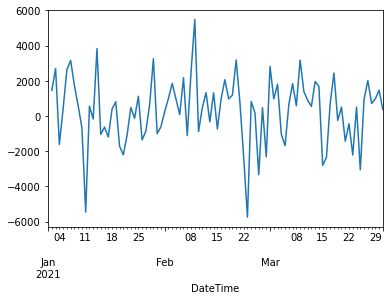

In [64]:
Bitcoin2021_df_copy['Price First Difference'].plot()


In [66]:
Bitcoin2021_df_copy['Seasonal First Difference']=Bitcoin2021_df_copy['Weighted Price']-Bitcoin2021_df_copy['Weighted Price'].shift(18)
Bitcoin2021_df_copy.head(20)

,Open,High,Low,Close,Weighted Price,Price First Difference,Seasonal First Difference
DateTime,,,,,,,
2021-01-01 00:00:00-05:00,29288.696937,29305.634083,29271.218694,29289.323146,29288.824917,NaN,NaN
2021-01-02 00:00:00-05:00,30757.308146,30788.244361,30723.941208,30759.932167,30757.429533,1468.604616,NaN
2021-01-03 00:00:00-05:00,33467.147104,33507.975028,33425.661465,33468.163000,33467.362526,2709.932993,NaN
2021-01-04 00:00:00-05:00,31856.851236,31903.705937,31807.243889,31856.172236,31856.122685,-1611.239840,NaN
2021-01-05 00:00:00-05:00,32272.714361,32314.153514,32230.931611,32274.551042,32273.087909,416.965224,NaN
2021-01-06 00:00:00-05:00,34906.719729,34947.409486,34862.609000,34907.603576,34904.997383,2631.909473,NaN
2021-01-07 00:00:00-05:00,38069.991174,38118.921056,38015.810944,38071.505882,38067.445472,3162.448089,NaN
2021-01-08 00:00:00-05:00,39811.488014,39873.263097,39745.853319,39811.639694,39807.603739,1740.158267,NaN
2021-01-09 00:00:00-05:00,40399.364424,40436.382826,40357.888361,40399.011125,40395.370088,587.766349,NaN


In [67]:
## Again test dickey fuller test
bitcoin_stationary(Bitcoin2021_df_copy['Seasonal First Difference'].dropna())

bitcoin_Stationary: -3.8326173870035927
p value:0.002590682372861766
Stationary


<AxesSubplot:xlabel='DateTime'>

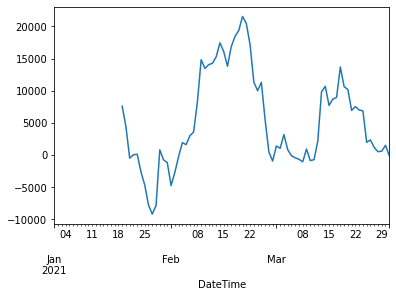

In [68]:
Bitcoin2021_df_copy['Seasonal First Difference'].plot()

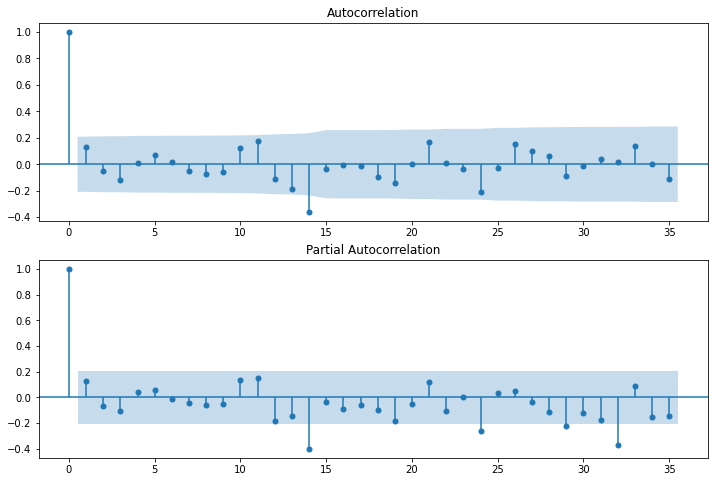

In [69]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sms.graphics.tsa.plot_acf(Bitcoin2021_df_copy['Price First Difference'].iloc[1:],lags=35,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sms.graphics.tsa.plot_pacf(Bitcoin2021_df_copy['Price First Difference'].iloc[1:],lags=35,ax=ax2)

In [70]:
Bitcoin2021_df_copy.drop(['Open','High','Low','Close'],1,inplace=True)
Bitcoin2021_df_copy.head()

,Weighted Price,Price First Difference,Seasonal First Difference
DateTime,,,
2021-01-01 00:00:00-05:00,29288.824917,NaN,NaN
2021-01-02 00:00:00-05:00,30757.429533,1468.604616,NaN
2021-01-03 00:00:00-05:00,33467.362526,2709.932993,NaN
2021-01-04 00:00:00-05:00,31856.122685,-1611.239840,NaN
2021-01-05 00:00:00-05:00,32273.087909,416.965224,NaN


In [71]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2021,2,28)
test_dataset_end=datetime(2021,3,31)

In [72]:
train_data=Bitcoin2021_df_copy[:train_dataset_end]
test_data=Bitcoin2021_df_copy[train_dataset_end+timedelta(days=1):test_dataset_end]

C:\Users\v-ansi20\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:5277: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  start_slice, end_slice = self.slice_locs(start, end, step=step, kind=kind)


In [73]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [74]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [75]:
train_data

,Weighted Price,Price First Difference,Seasonal First Difference
DateTime,,,
2021-01-01 00:00:00-05:00,29288.824917,NaN,NaN
2021-01-02 00:00:00-05:00,30757.429533,1468.604616,NaN
2021-01-03 00:00:00-05:00,33467.362526,2709.932993,NaN
2021-01-04 00:00:00-05:00,31856.122685,-1611.239840,NaN
2021-01-05 00:00:00-05:00,32273.087909,416.965224,NaN
2021-01-06 00:00:00-05:00,34904.997383,2631.909473,NaN
2021-01-07 00:00:00-05:00,38067.445472,3162.448089,NaN
2021-01-08 00:00:00-05:00,39807.603739,1740.158267,NaN
2021-01-09 00:00:00-05:00,40395.370088,587.766349,NaN


In [76]:
model_ARIMA=ARIMA(train_data['Weighted Price'],order=(1,1,1))

C:\Users\v-ansi20\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [77]:
model_Arima_fit=model_ARIMA.fit()

C:\Users\v-ansi20\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [78]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:       D.Weighted Price   No. Observations:                   58
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -522.254
Method:                       css-mle   S.D. of innovations           1968.870
Date:                Thu, 17 Mar 2022   AIC                           1052.508
Time:                        22:35:45   BIC                           1060.750
Sample:                    01-02-2021   HQIC                          1055.718
                         - 02-28-2021                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    261.7978    288.241      0.908      0.364    -303.144     826.739
ar.L1.D.Weighted Price    -0.2489      0.906     -0.275      0.783      -2.024       1.526
ma.L1.D.Weighted Price     0.3939      0.866      0.455      0.649      -1.304       2.091
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -4.0182           +0.0000j            4.0182            0.5000
MA.1           -2.5386           +0.0000j            2.5386            0.5000
-----------------------------------------------------------------------------
"""

In [79]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2021-03-01 00:00:00-05:00
2021-03-31 00:00:00-04:00


In [80]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Weighted Price']-pred

In [81]:
test_data['Predicted_ARIMA']=pred

<ipython-input-81-69896c9f46c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<AxesSubplot:xlabel='DateTime'>

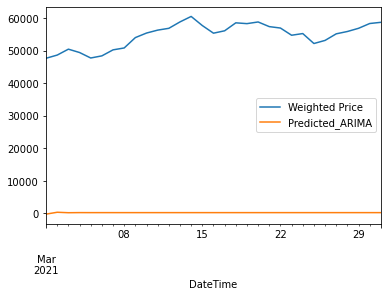

In [82]:
test_data[['Weighted Price','Predicted_ARIMA']].plot()

C:\Users\v-ansi20\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


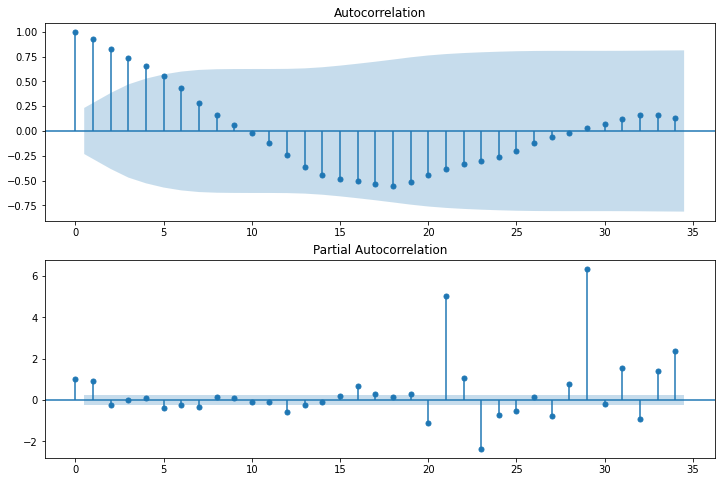

In [83]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sms.graphics.tsa.plot_acf(Bitcoin2021_df_copy['Seasonal First Difference'].iloc[19:],lags=34,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sms.graphics.tsa.plot_pacf(Bitcoin2021_df_copy['Seasonal First Difference'].iloc[19:],lags=34,ax=ax2)

In [84]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [85]:
model_SARIMA=SARIMAX(train_data['Weighted Price'],order=(2,1,5),seasonal_order=(2,1,5,18))

In [86]:
model_SARIMA_fit=model_SARIMA.fit()

C:\Users\v-ansi20\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\v-ansi20\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [87]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                     Weighted Price   No. Observations:                   59
Model:             SARIMAX(2, 1, 5)x(2, 1, 5, 18)   Log Likelihood                -365.020
Date:                            Thu, 17 Mar 2022   AIC                            760.039
Time:                                    22:37:30   BIC                            785.372
Sample:                                01-01-2021   HQIC                           769.199
                                     - 02-28-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8138      1.413      0.576      0.565      -1.955       3.583
ar.L2         -0.9911      1.582     -0.627      0.531      -4.091       2.109
ma.L1         -0.7006      1.713     -0.409      0.683      -4.058       2.657
ma.L2          1.0032      1.755      0.572      0.568      -2.436       4.443
ma.L3          0.0275      0.618      0.045      0.964      -1.183       1.238
ma.L4          0.0589      0.504      0.117      0.907      -0.929       1.047
ma.L5          0.0308      0.546      0.056      0.955      -1.040       1.101
ar.S.L18       1.0930   1.37e+04   7.97e-05      1.000   -2.69e+04    2.69e+04
ar.S.L36      -0.8127   1576.849     -0.001      1.000   -3091.380    3089.755
ma.S.L18      -1.4733   1.35e+04     -0.000      1.000   -2.64e+04    2.64e+04
ma.S.L36       1.1491   4146.185      0.000      1.000   -8125.224    8127.522
ma.S.L54      -0.3733   2320.390     -0.000      1.000   -4548.253    4547.507
ma.S.L72       0.1613   3119.483   5.17e-05      1.000   -6113.914    6114.236
ma.S.L90      -0.1388    438.506     -0.000      1.000    -859.596     859.318
sigma2      6.503e+06      0.209   3.11e+07      0.000     6.5e+06     6.5e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 3.64
Prob(Q):                              0.90   Prob(JB):                         0.16
Heteroskedasticity (H):               1.42   Skew:                             0.46
Prob(H) (two-sided):                  0.54   Kurtosis:                         4.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.37e+25. Standard errors may be unstable.
"""

In [88]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2021-03-01 00:00:00-05:00
2021-03-31 00:00:00-04:00


In [89]:
pred_Sarima=model_SARIMA_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Weighted Price']-pred_Sarima

In [90]:
test_data['Predicted_SARIMA']=pred_Sarima

<ipython-input-90-5be0f969ecf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [91]:
test_data

,Weighted Price,Price First Difference,Seasonal First Difference,Predicted_ARIMA,Predicted_SARIMA
DateTime,,,,,
2021-03-01 00:00:00-05:00,47640.764004,2820.736432,1368.548335,-194.952341,45045.531385
2021-03-02 00:00:00-05:00,48617.289321,976.525317,1013.873901,375.468311,47589.447327
2021-03-03 00:00:00-05:00,50426.994299,1809.704978,3152.894578,233.508853,48192.137530
2021-03-04 00:00:00-05:00,49398.250399,-1028.743901,801.049181,268.838022,48223.513432
2021-03-05 00:00:00-05:00,47717.643300,-1680.607098,-145.358126,260.045722,46244.646104
2021-03-06 00:00:00-05:00,48372.181680,654.538380,-472.984324,262.233844,46833.965769
2021-03-07 00:00:00-05:00,50214.468638,1842.286958,-699.455501,261.689291,49116.345357
2021-03-08 00:00:00-05:00,50797.906696,583.438058,-1095.404486,261.824813,51170.081203
2021-03-09 00:00:00-05:00,53980.847262,3182.940566,896.968153,261.791086,52092.427402


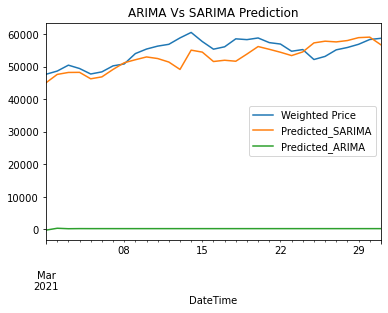

In [171]:
test_data[['Weighted Price','Predicted_SARIMA','Predicted_ARIMA']].plot()
plt.title('ARIMA Vs SARIMA Prediction')
plt.savefig("ARIMA Vs SARIMA.jpg")

In [150]:
from pandas.tseries.offsets import DateOffset
April_dates=[Bitcoin2021_df_copy.index[-1]+ DateOffset(days=x)for x in range(0,31)]
April_dates_df=pd.DataFrame(index=April_dates[1:],columns=Bitcoin2021_df_copy.columns)
April_dates_df.head(31)

,Weighted Price,Price First Difference,Seasonal First Difference
2021-04-01 00:00:00-04:00,NaN,NaN,NaN
2021-04-02 00:00:00-04:00,NaN,NaN,NaN
2021-04-03 00:00:00-04:00,NaN,NaN,NaN
2021-04-04 00:00:00-04:00,NaN,NaN,NaN
2021-04-05 00:00:00-04:00,NaN,NaN,NaN
2021-04-06 00:00:00-04:00,NaN,NaN,NaN
2021-04-07 00:00:00-04:00,NaN,NaN,NaN
2021-04-08 00:00:00-04:00,NaN,NaN,NaN
2021-04-09 00:00:00-04:00,NaN,NaN,NaN
2021-04-10 00:00:00-04:00,NaN,NaN,NaN


In [151]:
April_price_df=pd.concat([Bitcoin2021_df_copy,April_dates_df])
April_price_df.tail(100)

,Weighted Price,Price First Difference,Seasonal First Difference
2021-01-21 00:00:00-05:00,32949.072452,-2203.664852,-518.290074
2021-01-22 00:00:00-05:00,31861.057341,-1088.015111,4.934656
2021-01-23 00:00:00-05:00,32351.577069,490.519728,78.489160
2021-01-24 00:00:00-05:00,32225.945556,-125.631513,-2679.051827
2021-01-25 00:00:00-05:00,33353.085421,1127.139865,-4714.360051
...,...,...,...
2021-04-26 00:00:00-04:00,NaN,NaN,NaN
2021-04-27 00:00:00-04:00,NaN,NaN,NaN
2021-04-28 00:00:00-04:00,NaN,NaN,NaN
2021-04-29 00:00:00-04:00,NaN,NaN,NaN


In [152]:
##prediction
pred_start_date=April_dates_df.index[0]
pred_end_date=April_dates_df.index[-1]
print(pred_start_date)
print(pred_end_date)

2021-04-01 00:00:00-04:00
2021-04-30 00:00:00-04:00


C:\Users\v-ansi20\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


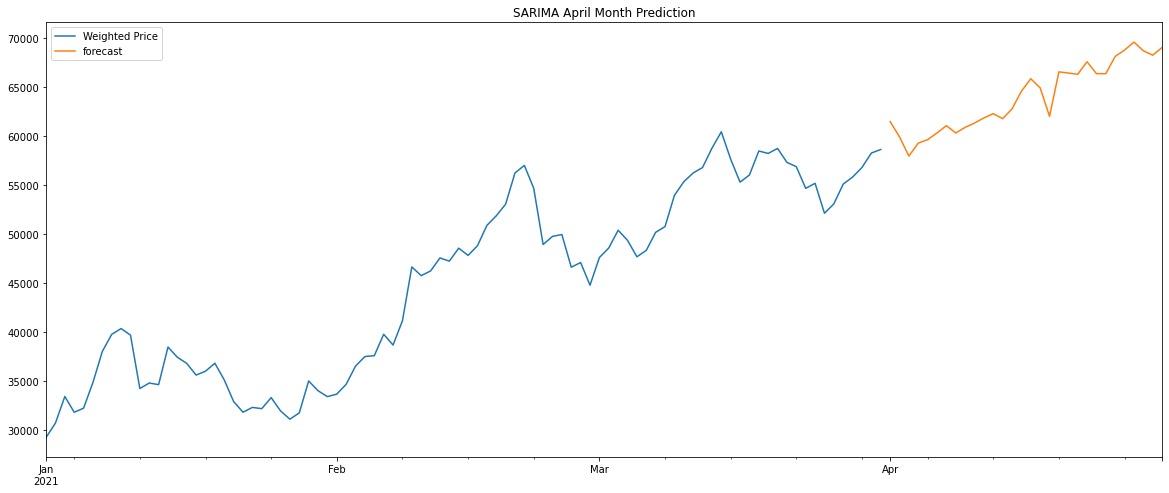

In [170]:
April_price_df['forecast'] = model_SARIMA_fit.predict(start = pred_start_date, end = pred_end_date, dynamic= True)  
April_price_df[['Weighted Price', 'forecast']].plot(figsize=(20, 8))
plt.title('SARIMA April Month Prediction')
plt.savefig("SARIMA April Month Prediction.jpg")

In [156]:
# April Bitcoin Prediction
April_price_df.tail(31)

,Weighted Price,Price First Difference,Seasonal First Difference,forecast
2021-03-31 00:00:00-04:00,58667.396101,366.600053,-126.302809,NaN
2021-04-01 00:00:00-04:00,NaN,NaN,NaN,61519.782817
2021-04-02 00:00:00-04:00,NaN,NaN,NaN,59958.736515
2021-04-03 00:00:00-04:00,NaN,NaN,NaN,57997.020046
2021-04-04 00:00:00-04:00,NaN,NaN,NaN,59311.687212
2021-04-05 00:00:00-04:00,NaN,NaN,NaN,59668.547984
2021-04-06 00:00:00-04:00,NaN,NaN,NaN,60351.595855
2021-04-07 00:00:00-04:00,NaN,NaN,NaN,61097.003102
2021-04-08 00:00:00-04:00,NaN,NaN,NaN,60350.906374
2021-04-09 00:00:00-04:00,NaN,NaN,NaN,60924.331183


In [155]:
# Exporting April 2021 prediction data into CSV
April_price_df.to_csv (r'C:/Users/v-ansi20/Desktop/Bitcoin_2021 April prediction.csv', index = False, header=True)